# HPAI Outbreak Analysis with Weather and Flock Data

## Purpose and Scope

The purpose of this notebook is to analyze the outbreaks of Highly Pathogenic Avian Influenza (HPAI) across different states in the United States. The analysis aims to identify patterns and clusters in the data related to weather conditions, wild bird outbreaks, livestock outbreaks, mammal outbreaks, and flock characteristics.

The key objectives of the analysis are:

1. To explore the relationship between HPAI outbreaks and various factors such as temperature, precipitation, and drought conditions.
2. To identify clusters of states with similar characteristics in terms of HPAI outbreaks and associated factors.
3. To gain insights into the factors that may contribute to the spread and severity of HPAI outbreaks.

## Data

The notebook uses the following datasets:

1. `weather.csv`: This dataset contains state-level information on temperature, temperature anomaly, precipitation, and the Palmer Z-Index (a measure of drought conditions).
2. `hpai-wild-birds.csv`: This dataset provides the number of HPAI outbreaks in wild birds for each state.
3. `hpai-livestock.csv`: This dataset contains the number of HPAI outbreaks in livestock for each state.
4. `hpai-mammals.csv`: This dataset includes the number of HPAI outbreaks in mammals for each state.
5. `hpai-flocks.csv`: This dataset provides information on the number of birds affected and the flock size for each state.

The data is loaded and cleaned, with missing values in the "Birds Affected" and "Flock Size" columns being replaced with 0. The data is then aggregated at the state level, and all the relevant features are merged into a single DataFrame.

## Modeling and Clustering Approach

The analysis uses Principal Component Analysis (PCA) and K-means clustering to identify patterns and clusters in the data.

1. **Feature Preparation**: The features used for clustering include temperature, temperature anomaly, precipitation, Palmer Z-Index, the number of wild bird outbreaks, livestock outbreaks, mammal outbreaks, the total number of birds affected, and the total flock size. These features are scaled using StandardScaler to ensure they are on a similar scale.

2. **Elbow Analysis**: An elbow analysis is performed to determine the optimal number of clusters. The inertia (within-cluster sum of squares) is plotted against the number of clusters (k), and the "elbow" in the plot is used to identify the appropriate number of clusters.

3. **PCA and K-means Clustering**: Based on the elbow analysis, the optimal number of clusters is determined to be 4. PCA is then applied to the scaled features to reduce the dimensionality, and K-means clustering is performed on the transformed data to identify the 4 clusters.

## Visualizations

The notebook includes the following visualization:

1. **Elbow Plot**: The elbow plot shows the inertia (within-cluster sum of squares) for different numbers of clusters (k). This plot is used to determine the optimal number of clusters.

## Key Findings and Conclusions

The key findings and conclusions from the analysis are:

1. The elbow plot suggests that 4 clusters is an appropriate number of clusters to represent the data.
2. The PCA and K-means clustering identify 4 distinct clusters of states based on the HPAI outbreak characteristics and associated factors.
3. The clusters likely represent groups of states with similar patterns in terms of temperature, precipitation, drought conditions, and the number and severity of HPAI outbreaks in wild birds, livestock, and mammals.
4. The analysis provides insights into the factors that may contribute to the spread and severity of HPAI outbreaks, which can inform disease prevention and control strategies.

Overall, this notebook demonstrates a comprehensive approach to analyzing HPAI outbreaks and their relationship with various environmental and flock-level factors, using PCA and K-means clustering to identify meaningful patterns and groups of states.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Clear any existing plots
plt.close('all')

In [2]:
# Load datasets
weather_df = pd.read_csv('./Data/weather.csv')
wild_birds_df = pd.read_csv('./Data/hpai-wild-birds1.csv')
livestock_df = pd.read_csv('./Data/hpai-livestock.csv')
mammals_df = pd.read_csv('./Data/hpai-mammals.csv')
flocks_df = pd.read_csv('./Data/hpai-flocks.csv')

In [3]:
# Clean the Birds Affected and Flock Size columns
def clean_numeric(x):
    if pd.isna(x):
        return 0
    # Remove commas and convert to float
    try:
        return float(str(x).replace(',', ''))
    except:
        return 0

# Clean the flocks data
flocks_df['Birds Affected'] = flocks_df['Birds Affected'].apply(clean_numeric)
flocks_df['Flock Size'] = flocks_df['Flock Size'].apply(clean_numeric)

In [4]:
# Aggregate data by state
weather_state = weather_df.groupby('State').agg({
    'Temp': 'mean',
    'Temp Anomaly (1901-2000 base period)': 'mean',
    'Precipitation': 'mean',
    'Z Palmer Index': 'mean'
}).reset_index()

wild_birds_count = wild_birds_df['State'].value_counts().reset_index()
wild_birds_count.columns = ['State', 'Wild_Bird_Outbreaks']

livestock_count = livestock_df['State'].value_counts().reset_index()
livestock_count.columns = ['State', 'Livestock_Outbreaks']

mammals_count = mammals_df['State'].value_counts().reset_index()
mammals_count.columns = ['State', 'Mammal_Outbreaks']

flocks_state = flocks_df.groupby('State').agg({
    'Birds Affected': 'sum',
    'Flock Size': 'sum'
}).reset_index()

In [5]:
# Merge all data
merged_df = weather_state.merge(wild_birds_count, on='State', how='left')    .merge(livestock_count, on='State', how='left')    .merge(mammals_count, on='State', how='left')    .merge(flocks_state, on='State', how='left')
merged_df = merged_df.fillna(0)

In [6]:
# Prepare features for clustering
features = ['Temp', 'Temp Anomaly (1901-2000 base period)', 
           'Precipitation', 'Z Palmer Index',
           'Wild_Bird_Outbreaks', 'Livestock_Outbreaks', 'Mammal_Outbreaks',
           'Birds Affected', 'Flock Size']
X = merged_df[features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

c:\Users\mward\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\mward\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\mward\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\mward\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is k

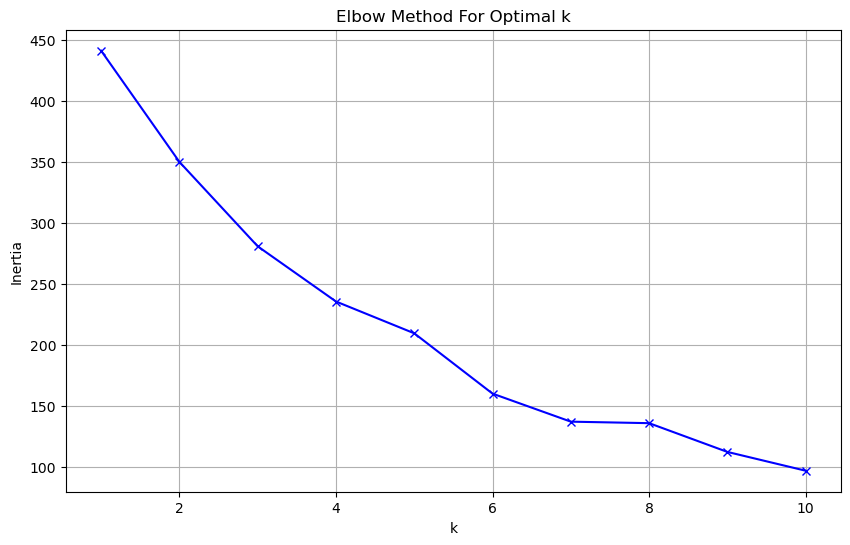

In [7]:
# Perform elbow analysis
inertias = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

In [8]:
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply K-means clustering with optimal k=4 (based on elbow curve)
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

c:\Users\mward\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


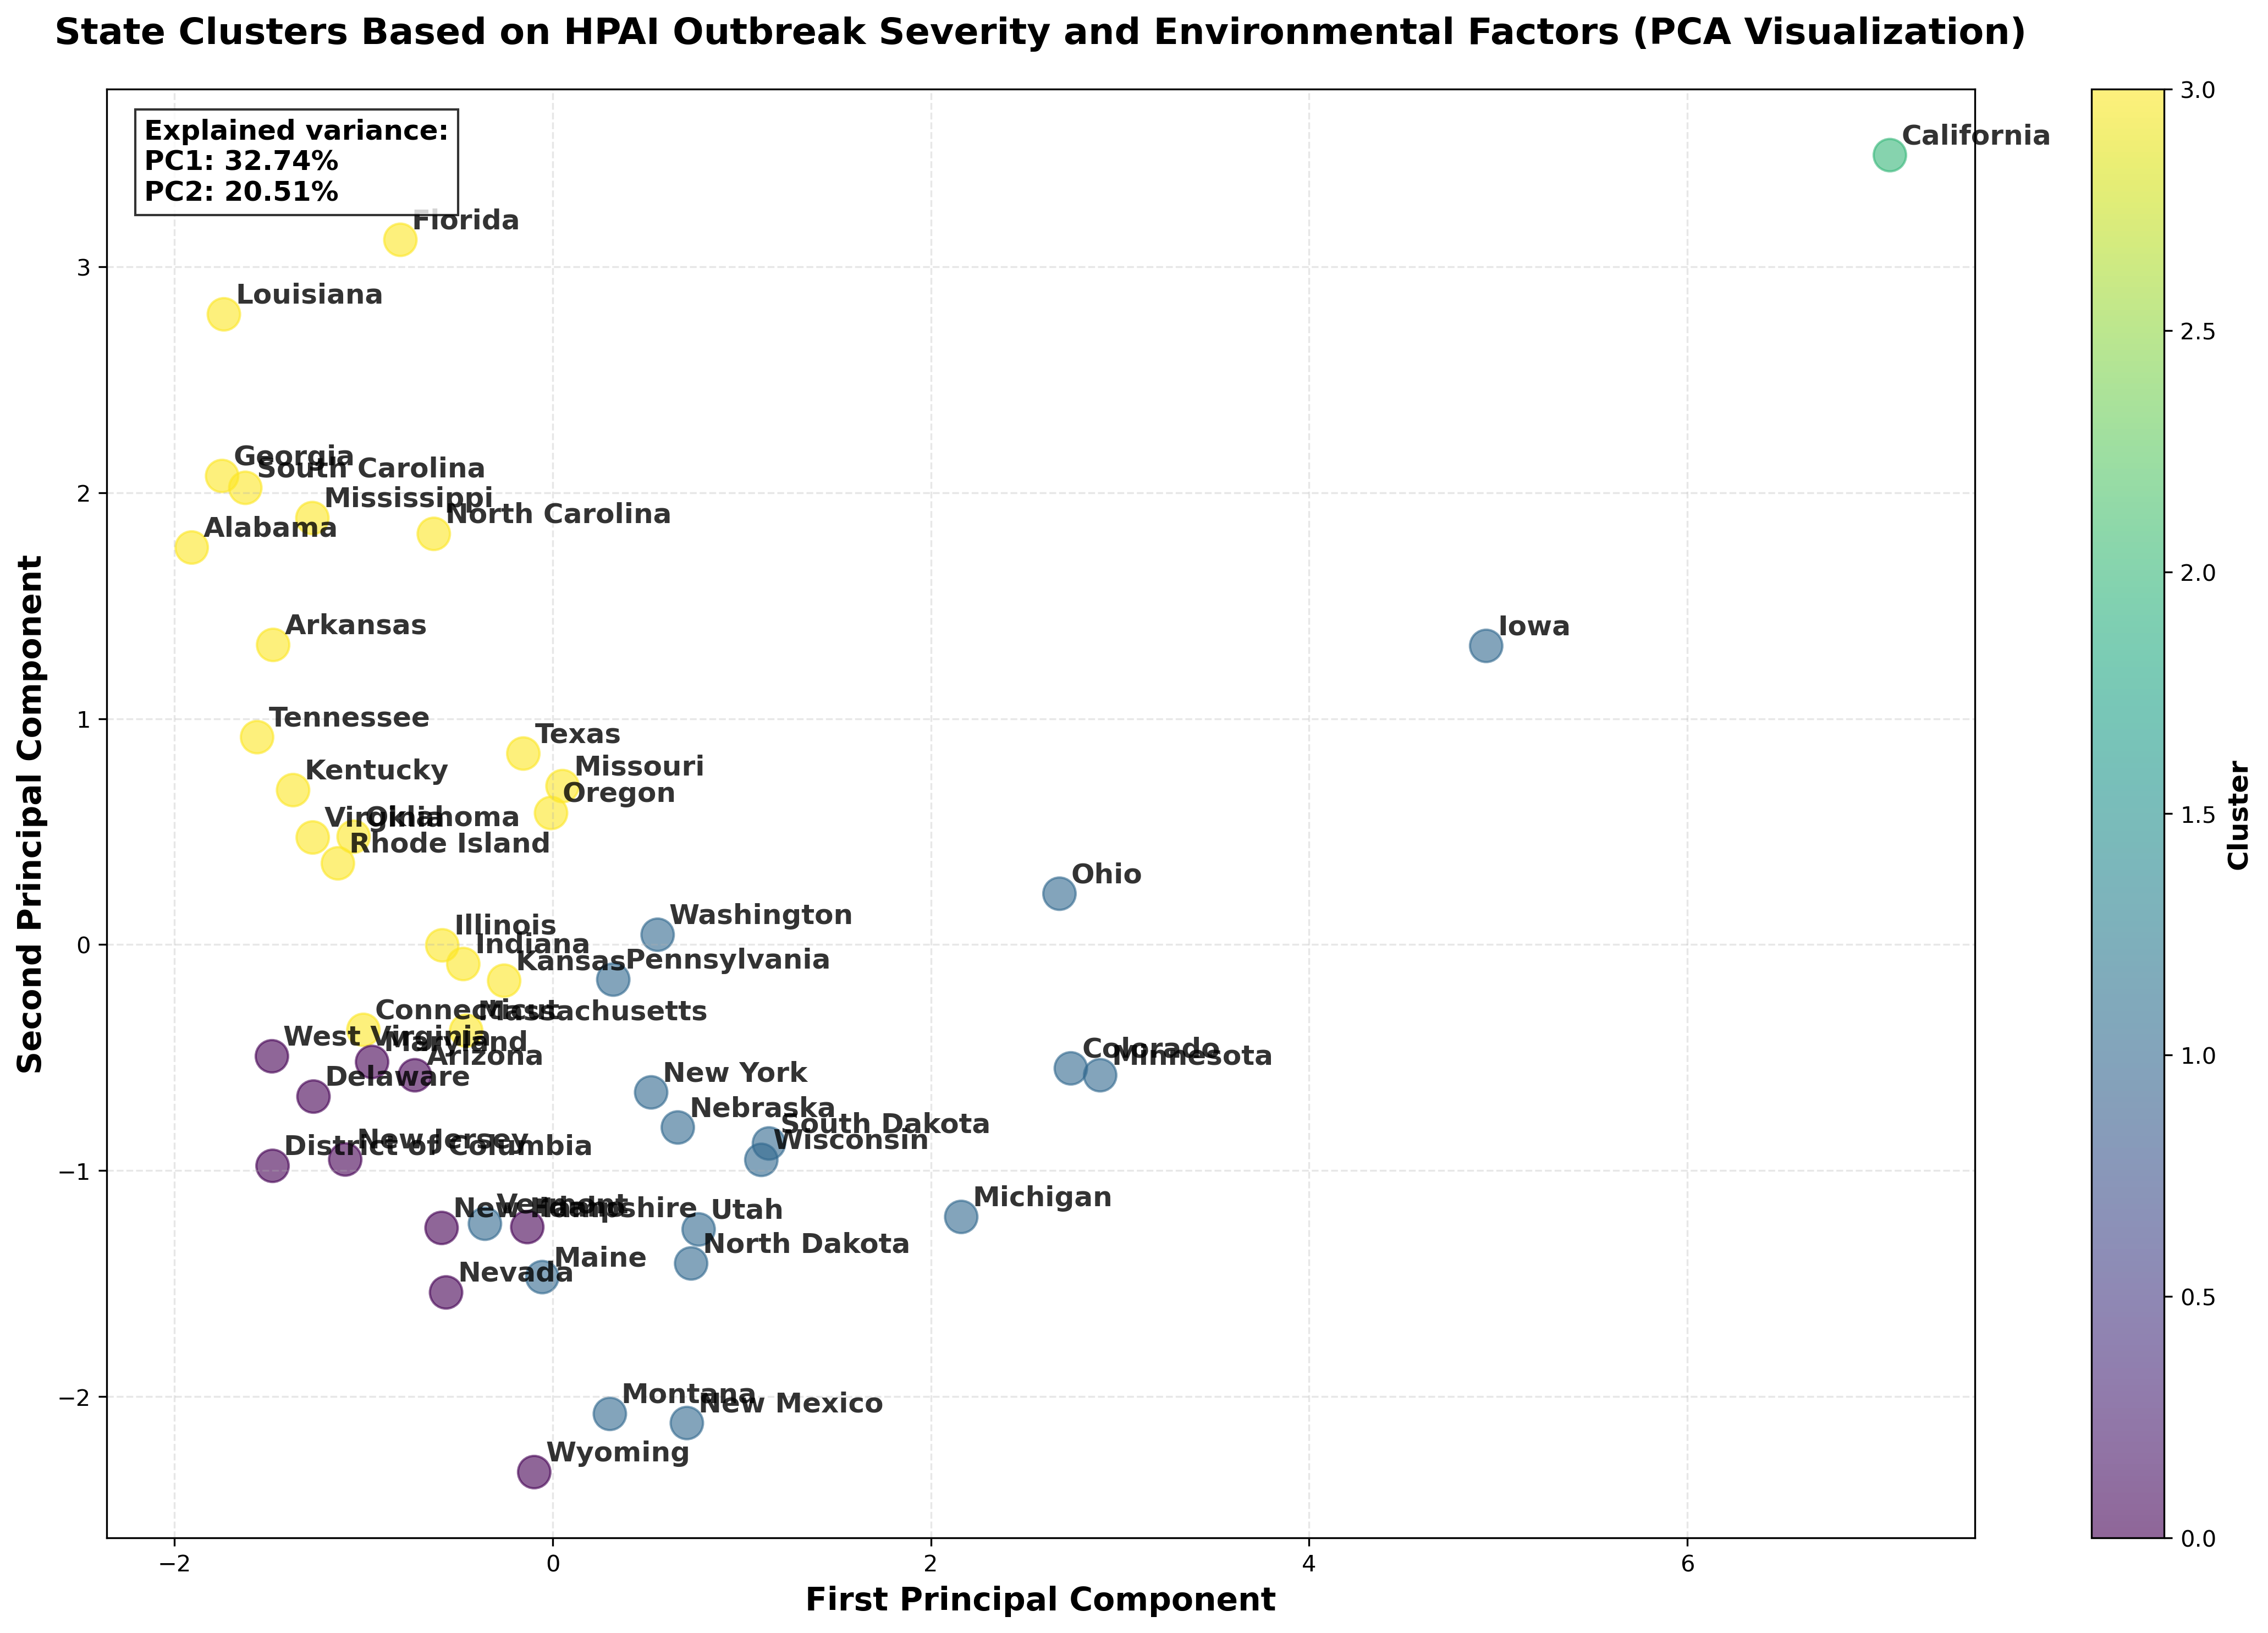

In [9]:
# Create PCA visualization
plt.figure(figsize=(15, 10), dpi=300)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], 
                     c=clusters,
                     cmap='viridis',
                     s=200,
                     alpha=0.6)

# Add state labels
for i, state in enumerate(merged_df['State']):
    plt.annotate(state,
                (X_pca[i, 0], X_pca[i, 1]),
                xytext=(5, 5),
                textcoords='offset points',
                fontsize=12,
                weight='bold',
                alpha=0.8)

# Set labels and title
plt.xlabel('First Principal Component', fontsize=14, weight='bold')
plt.ylabel('Second Principal Component', fontsize=14, weight='bold')
plt.title('State Clusters Based on HPAI Outbreak Severity and Environmental Factors (PCA Visualization)',
          fontsize=16, weight='bold', pad=20)

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Cluster', fontsize=12, weight='bold')

# Add explained variance ratio
explained_var = pca.explained_variance_ratio_
plt.text(0.02, 0.98,
         f'Explained variance:\nPC1: {explained_var[0]:.2%}\nPC2: {explained_var[1]:.2%}',
         transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='black'),
         verticalalignment='top',
         fontsize=12,
         weight='bold')

plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

In [10]:
# Print feature importance
feature_importance = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=features
)
print("\nPCA Components Feature Importance:")
print(feature_importance)

# Print top states by Birds Affected
print("\nTop 5 states by Birds Affected:")
print(merged_df.nlargest(5, 'Birds Affected')[['State', 'Birds Affected', 'Flock Size']])


PCA Components Feature Importance:
                                           PC1       PC2
Temp                                 -0.225323  0.563032
Temp Anomaly (1901-2000 base period)  0.214256 -0.386143
Precipitation                        -0.231368  0.502916
Z Palmer Index                        0.111377  0.258057
Wild_Bird_Outbreaks                   0.339655  0.230576
Livestock_Outbreaks                   0.368883  0.259287
Mammal_Outbreaks                      0.285671 -0.181927
Birds Affected                        0.502165  0.174467
Flock Size                            0.502165  0.174467

Top 5 states by Birds Affected:
         State  Birds Affected  Flock Size
13        Iowa      29957524.0  29957524.0
3   California      23430312.0  23430312.0
33        Ohio      21017006.0  21017006.0
4     Colorado       9735592.0   9735592.0
21   Minnesota       9119859.0   9119859.0


# **Principal Component Analysis (PCA) and Clustering Summary**  

## **PCA Overview**  

### **PCA1 (First Principal Component):**  
- Represents the largest source of variation in the data.  
- Strongly influenced by outbreak severity (`Birds Affected`, `Flock Size`).  
- States further to the right on the plot have larger outbreaks.  

### **PCA2 (Second Principal Component):**  
- Represents the second-largest source of variation.  
- Heavily influenced by temperature and precipitation.  
- States higher up on the plot tend to have higher temperatures and precipitation.  

---

## **Cluster Breakdown**  

### **Cluster 0: Southern/Southeastern States**  
- **States:** Alabama, Arkansas, Florida, Georgia, Kentucky, Louisiana, Mississippi, Missouri, North Carolina, Oklahoma, Oregon, Rhode Island, South Carolina, Tennessee, Texas, Virginia  
- **Characteristics:**  
  - Includes **Texas** and most southeastern states.  
  - **Moderate outbreak sizes:** ~935,000 birds affected.  
  - **Highest average temperatures and precipitation.**  
  - **Moderate number of wild bird outbreaks.**  

---

### **Cluster 1: Major Outbreak States**  
- **States:** California, Iowa, Ohio  
- **Characteristics:**  
  - Characterized by **massive outbreaks** (~24.8 million birds affected on average).  
  - **Highest number of both wild bird and livestock outbreaks.**  
  - **Moderate temperatures** with **varied precipitation.**  

---

### **Cluster 2: Northern States**  
- **States:** Colorado, Maine, Michigan, Minnesota, Montana, New Mexico, New York, North Dakota, South Dakota, Vermont, Washington, Wisconsin  
- **Characteristics:**  
  - Includes **northern states with colder climates.**  
  - **Moderate to large outbreaks:** ~3.2 million birds affected.  
  - **High number of wild bird outbreaks.**  
  - **Lowest average temperatures.**  

---

### **Cluster 3: Mixed/Moderate Impact States**  
- **States:** Arizona, Connecticut, Delaware, District of Columbia, Idaho, Illinois, Indiana, Kansas, Maryland, Massachusetts, Nebraska, Nevada, New Hampshire, New Jersey, Pennsylvania, Utah, West Virginia, Wyoming  
- **Characteristics:**  
  - A mix of **northeastern and central states.**  
  - **Smaller outbreak sizes:** ~1.6 million birds affected.  
  - **Lowest number of wild bird outbreaks.**  
  - **Moderate temperatures** and **lower precipitation.**

---  

  ## **Conclusions:**  
The identified clusters provide valuable insights into different patterns of HPAI transmission events:  
- **Wild Bird outbreaks** typically involve small flock sizes with few birds affected.  
- **Livestock outbreaks** involve larger flocks but show different levels of bird impact.  
- **Flock-based outbreaks** show the highest number of affected birds.  

    ## Analysis Results
    1. The elbow curve helps determine the optimal number of clusters (k=4)
    2. PCA reveals the main components of variation in the data
    3. The clustering shows distinct patterns in HPAI outbreaks across states
    4. Feature importance shows which variables contribute most to the patterns
    5. The top affected states by bird count are clearly identified

These insights are critical for understanding the dynamics of HPAI outbreaks and can support targeted disease prevention and control strategies.